# Convolutional Neural Networks in PyTorch
> In this third chapter, we introduce convolutional neural networks, learning how to train them and how to use them to make predictions. This is the Summary of lecture "Introduction to Deep Learning with PyTorch", via datacamp.

- toc: true
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, PyTorch, Deep_Learning]
- image: images/alexnet.png

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

## Convolution operator
- Problems with the Fully-connected nn
    - Do you need to consider all the relations between the features?
    - Fully connected nn are big and so very computationally inefficient
    - They have so many parameters, and so overfit
- Main idea of CNN
    - Units are connected with only a few units from the previous layer
    - Units share weights
![convolution](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolutions.png?raw=1)
- Convolving operation
![convolution2](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/convolution2.png?raw=1)
- Activation map
![act](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/act_map.png?raw=1)

### Convolution operator - OOP way
Let's kick off this chapter by using convolution operator from the `torch.nn` package. You are going to create a random tensor which will represent your image and random filters to convolve the image with. Then you'll apply those images.

In [ ]:
# Create 10 random images of shape (1, 28, 28)
images = torch.rand(10, 1, 28, 28)

# Build 6 conv. filters
conv_filters = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=(3, 3), stride=1, padding=1)

# Convolve the image with the filters
output_feature = conv_filters(images)
print(images.shape)
print(output_feature.shape)

torch.Size([10, 1, 28, 28])
torch.Size([10, 6, 28, 28])


### Convolution operator - Functional way
While I and most of PyTorch practitioners love the `torch.nn` package (OOP way), other practitioners prefer building neural network models in a more functional way, using `torch.nn.functional`. More importantly, it is possible to mix the concepts and use both libraries at the same time (we have already done it in the previous chapter). You are going to build the same neural network you built in the previous exercise, but this time using the functional way.

In [ ]:
# Create 10 random images
images = torch.rand(10, 1, 28, 28)

# Create 6 filters
filters = torch.rand(6, 1, 3, 3)

# Convolve the image with the filters
output_feature = F.conv2d(images, filters, stride=1, padding=1)
print(output_feature.shape)

torch.Size([10, 6, 28, 28])


### Pooling operators
- For feature selection,
![pooling](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/pooling.png?raw=1)
- Max-Pooling
![maxpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/maxpool.png?raw=1)
- Average-Pooling
![avgpool](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/image/avgpool.png?raw=1)

### Max-pooling operator
Here you are going to practice using max-pooling in both OOP and functional way, and see for yourself that the produced results are the same.

In [ ]:
im = torch.rand(1, 1, 6, 6)
im

tensor([[[[0.5658, 0.6065, 0.9091, 0.0784, 0.1710, 0.0253],
          [0.8560, 0.0173, 0.8331, 0.4535, 0.2458, 0.5973],
          [0.9855, 0.3339, 0.0712, 0.6478, 0.1580, 0.8294],
          [0.8922, 0.1784, 0.0153, 0.9922, 0.9821, 0.2835],
          [0.0893, 0.0492, 0.0892, 0.6688, 0.9596, 0.0849],
          [0.0702, 0.5122, 0.4050, 0.9780, 0.3681, 0.3107]]]])

In [ ]:
# Build a pooling operator with size 2
max_pooling = nn.MaxPool2d(2)

# Apply the pooling operator
output_feature = max_pooling(im)

# Use pooling operator in the image
output_feature_F = F.max_pool2d(im, 2)

# Print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[0.8560, 0.9091, 0.5973],
          [0.9855, 0.9922, 0.9821],
          [0.5122, 0.9780, 0.9596]]]])
tensor([[[[0.8560, 0.9091, 0.5973],
          [0.9855, 0.9922, 0.9821],
          [0.5122, 0.9780, 0.9596]]]])


### Average-pooling operator
After coding the max-pooling operator, you are now going to code the average-pooling operator. You just need to replace max-pooling with average pooling.



In [ ]:
# Build a pooling operator with size 2
avg_pooling = nn.AvgPool2d(2)

# Apply the pooling operator
output_feature = avg_pooling(im)

# Use pooling operator in the image
output_feature_F = F.avg_pool2d(im, 2)

# Print the results of both cases
print(output_feature)
print(output_feature_F)

tensor([[[[0.5114, 0.5685, 0.2598],
          [0.5975, 0.4316, 0.5632],
          [0.1802, 0.5353, 0.4308]]]])
tensor([[[[0.5114, 0.5685, 0.2598],
          [0.5975, 0.4316, 0.5632],
          [0.1802, 0.5353, 0.4308]]]])


### Your first CNN - __init__ method
You are going to build your first convolutional neural network. You're going to use the MNIST dataset as the dataset, which is made of handwritten digits from 0 to 9. The convolutional neural network is going to have 2 convolutional layers, each followed by a ReLU nonlinearity, and a fully connected layer. Remember that each pooling layer halves both the height and the width of the image, so by using 2 pooling layers, the height and width are 1/4 of the original sizes. MNIST images have shape (1, 28, 28)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc = nn.Linear(49 * 10, 10)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Prepare the image for the fully connected layer
        x = x.view(-1, 7 * 7 * 10)

        # Apply the fully connected layer and return the result
        return self.fc(x)

In [ ]:
x = torch.rand(1, 1, 28, 28)
y_hat = Net()(x)
print(y_hat.shape)

torch.Size([1, 10])


#### Torchsummary library help to see the number of parameters inside our created model

In [ ]:
from torchsummary import summary
summary(Net(), (1, 28, 28)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 28, 28]              50
              ReLU-2            [-1, 5, 28, 28]               0
         MaxPool2d-3            [-1, 5, 14, 14]               0
            Conv2d-4           [-1, 10, 14, 14]             460
              ReLU-5           [-1, 10, 14, 14]               0
         MaxPool2d-6             [-1, 10, 7, 7]               0
            Linear-7                   [-1, 10]           4,910
Total params: 5,420
Trainable params: 5,420
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.02
Estimated Total Size (MB): 0.12
----------------------------------------------------------------


### Assume, we need to use just feature output, so we didn't need to create nn.Linear so as to be any classifier head.

In [ ]:
class Net_without_class_head(nn.Module):
    def __init__(self):
        super(Net_without_class_head, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Use feature output from encoder only
        return x

In [ ]:
x = torch.rand(1, 1, 28, 28)
y_hat_2 = Net_without_class_head()(x)
print(y_hat_2.shape)

torch.Size([1, 10, 7, 7])


In [ ]:
summary(Net_without_class_head(), (1, 28, 28)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 28, 28]              50
              ReLU-2            [-1, 5, 28, 28]               0
         MaxPool2d-3            [-1, 5, 14, 14]               0
            Conv2d-4           [-1, 10, 14, 14]             460
              ReLU-5           [-1, 10, 14, 14]               0
         MaxPool2d-6             [-1, 10, 7, 7]               0
Total params: 510
Trainable params: 510
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.00
Estimated Total Size (MB): 0.11
----------------------------------------------------------------


### If we design our model more deeper & deeper, including higher & higher image size

In [ ]:
class Net_wo_head_more_deeper(nn.Module):
    def __init__(self):
        super(Net_wo_head_more_deeper, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=5, kernel_size=2, padding=1)
        self.conv2 = nn.Conv2d(in_channels=5, out_channels=10, kernel_size=2, padding=1)
        self.conv3 = nn.Conv2d(in_channels=10, out_channels=20, kernel_size=2, padding=1)
        self.conv4 = nn.Conv2d(in_channels=20, out_channels=10, kernel_size=2, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv3(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv4(x))
        x = self.pool(x)

        # Use feature output from encoder only
        return x

In [ ]:
# Image shape = 1x28x28
x = torch.rand(1, 1, 28, 28)
y_hat_3 = Net_wo_head_more_deeper()(x)
print(y_hat_3.shape)

torch.Size([1, 10, 2, 2])


In [ ]:
summary(Net_wo_head_more_deeper(), (1, 28, 28)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 29, 29]              25
              ReLU-2            [-1, 5, 29, 29]               0
         MaxPool2d-3            [-1, 5, 14, 14]               0
            Conv2d-4           [-1, 10, 15, 15]             210
              ReLU-5           [-1, 10, 15, 15]               0
         MaxPool2d-6             [-1, 10, 7, 7]               0
            Conv2d-7             [-1, 20, 8, 8]             820
              ReLU-8             [-1, 20, 8, 8]               0
         MaxPool2d-9             [-1, 20, 4, 4]               0
           Conv2d-10             [-1, 10, 5, 5]             810
             ReLU-11             [-1, 10, 5, 5]               0
        MaxPool2d-12             [-1, 10, 2, 2]               0
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
-----------------------------------

In [ ]:
# Image shape = 1x64x64
x = torch.rand(1, 1, 64, 64)
y_hat_3_1 = Net_wo_head_more_deeper()(x)
print(y_hat_3_1.shape)

torch.Size([1, 10, 4, 4])


In [ ]:
summary(Net_wo_head_more_deeper(), (1, 64, 64)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 5, 65, 65]              25
              ReLU-2            [-1, 5, 65, 65]               0
         MaxPool2d-3            [-1, 5, 32, 32]               0
            Conv2d-4           [-1, 10, 33, 33]             210
              ReLU-5           [-1, 10, 33, 33]               0
         MaxPool2d-6           [-1, 10, 16, 16]               0
            Conv2d-7           [-1, 20, 17, 17]             820
              ReLU-8           [-1, 20, 17, 17]               0
         MaxPool2d-9             [-1, 20, 8, 8]               0
           Conv2d-10             [-1, 10, 9, 9]             810
             ReLU-11             [-1, 10, 9, 9]               0
        MaxPool2d-12             [-1, 10, 4, 4]               0
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
-----------------------------------

In [ ]:
# Image shape = 1x224x224
x = torch.rand(1, 1, 224, 224)
y_hat_3_2 = Net_wo_head_more_deeper()(x)
print(y_hat_3_2.shape)

torch.Size([1, 10, 14, 14])


In [ ]:
summary(Net_wo_head_more_deeper(), (1, 224, 224)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 5, 225, 225]              25
              ReLU-2          [-1, 5, 225, 225]               0
         MaxPool2d-3          [-1, 5, 112, 112]               0
            Conv2d-4         [-1, 10, 113, 113]             210
              ReLU-5         [-1, 10, 113, 113]               0
         MaxPool2d-6           [-1, 10, 56, 56]               0
            Conv2d-7           [-1, 20, 57, 57]             820
              ReLU-8           [-1, 20, 57, 57]               0
         MaxPool2d-9           [-1, 20, 28, 28]               0
           Conv2d-10           [-1, 10, 29, 29]             810
             ReLU-11           [-1, 10, 29, 29]               0
        MaxPool2d-12           [-1, 10, 14, 14]               0
Total params: 1,865
Trainable params: 1,865
Non-trainable params: 0
-----------------------------------

In-Class Exercises\
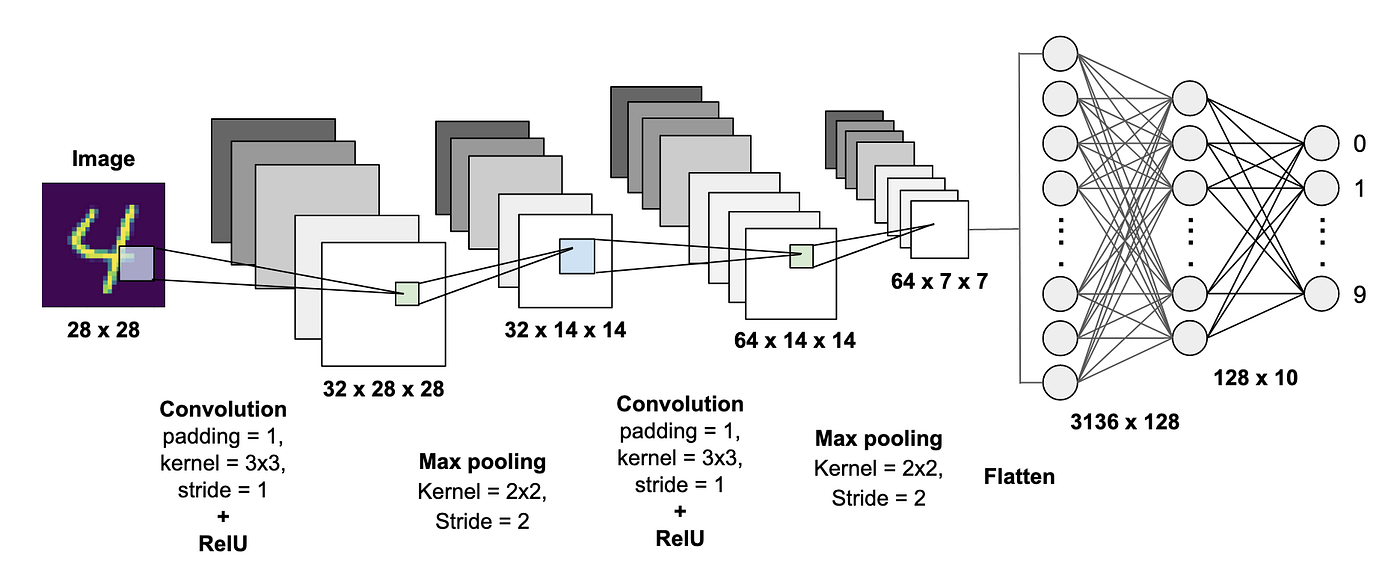
1.) จงสร้างโมเดลตามตัวอย่าง คำนวณหาจำนวน Parameters และ Memory ที่ใช้ของโมเดล\
2.) จงเปรียบเทียบการใช้งาน resources (Parameters, Memory, etc.) จากข้อ 1.) เมื่อใช้ภาพขนาด 1x28x28 (ดั้งเดิมตามตัวอย่าง), 1x224x224, 1x512x512, 1x1024x1024 ทั้งหมด 3 ตัวอย่างขนาดภาพ

In [ ]:
class Net_in_class_excercise(nn.Module):
    def __init__(self):
        super(Net_in_class_excercise, self).__init__()

        # Instantiate two convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        # Instantiate the ReLU nonlinearity
        self.relu = nn.ReLU(inplace=True)

        # Instantiate a max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Instantiate a fully connected layer
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Apply conv followed by relu, then in next line pool
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Compute the input size for fc1 dynamically
        if not hasattr(self, 'fc1_input_features'):
            self.fc1_input_features = x.numel() // x.size(0)
            self.fc1 = nn.Linear(self.fc1_input_features, 128)

        # Prepare the image for the fully connected layer
        x = x.view(-1, self.fc1_input_features)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        # Use feature output from encoder only
        return x

In [ ]:
# Image shape = 1x28x28
x = torch.rand(1, 1, 28, 28)
y_hat_4_1 = Net_in_class_excercise()(x)
print(y_hat_4_1.shape)

torch.Size([1, 1])


In [ ]:
summary(Net_in_class_excercise(), (1, 28, 28)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
              ReLU-2           [-1, 32, 28, 28]               0
         MaxPool2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
              ReLU-5           [-1, 64, 14, 14]               0
         MaxPool2d-6             [-1, 64, 7, 7]               0
            Linear-7                   [-1, 10]           1,290
            Linear-8                    [-1, 1]              11
Total params: 20,117
Trainable params: 20,117
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.65
Params size (MB): 0.08
Estimated Total Size (MB): 0.73
----------------------------------------------------------------


In [ ]:
# Image shape = 1x224x224
x = torch.rand(1, 1, 224, 224)
y_hat_4_2 = Net_in_class_excercise()(x)
print(y_hat_4_2.shape)

torch.Size([1, 1])


In [ ]:
summary(Net_in_class_excercise(), (1, 224, 224)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             320
              ReLU-2         [-1, 32, 224, 224]               0
         MaxPool2d-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 64, 112, 112]          18,496
              ReLU-5         [-1, 64, 112, 112]               0
         MaxPool2d-6           [-1, 64, 56, 56]               0
            Linear-7                   [-1, 10]           1,290
            Linear-8                    [-1, 1]              11
Total params: 20,117
Trainable params: 20,117
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 41.34
Params size (MB): 0.08
Estimated Total Size (MB): 41.61
----------------------------------------------------------------


In [ ]:
# Image shape = 1x512x512
x = torch.rand(1, 1, 512, 512)
y_hat_4_3 = Net_in_class_excercise()(x)
print(y_hat_4_3.shape)

torch.Size([1, 1])


In [ ]:
summary(Net_in_class_excercise(), (1, 512, 512)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 512, 512]             320
              ReLU-2         [-1, 32, 512, 512]               0
         MaxPool2d-3         [-1, 32, 256, 256]               0
            Conv2d-4         [-1, 64, 256, 256]          18,496
              ReLU-5         [-1, 64, 256, 256]               0
         MaxPool2d-6         [-1, 64, 128, 128]               0
            Linear-7                   [-1, 10]           1,290
            Linear-8                    [-1, 1]              11
Total params: 20,117
Trainable params: 20,117
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.00
Forward/backward pass size (MB): 216.00
Params size (MB): 0.08
Estimated Total Size (MB): 217.08
----------------------------------------------------------------


In [ ]:
# Image shape = 1x1024x1024
x = torch.rand(1, 1, 1024, 1024)
y_hat_4_4 = Net_in_class_excercise()(x)
print(y_hat_4_4.shape)

torch.Size([1, 1])


In [ ]:
summary(Net_in_class_excercise(), (1, 1024, 1024)) #summary(Model, (3D-image shape))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1       [-1, 32, 1024, 1024]             320
              ReLU-2       [-1, 32, 1024, 1024]               0
         MaxPool2d-3         [-1, 32, 512, 512]               0
            Conv2d-4         [-1, 64, 512, 512]          18,496
              ReLU-5         [-1, 64, 512, 512]               0
         MaxPool2d-6         [-1, 64, 256, 256]               0
            Linear-7                   [-1, 10]           1,290
            Linear-8                    [-1, 1]              11
Total params: 20,117
Trainable params: 20,117
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 4.00
Forward/backward pass size (MB): 864.00
Params size (MB): 0.08
Estimated Total Size (MB): 868.08
----------------------------------------------------------------
